In [106]:
import os

strings = ['Servers that crashed during execution:', 
           'Servers that were failed by simulator:', 
           'Total messages sent:',
           'Total client get() requests:',
           'Total client put() requests:', 
           'Total duplicate responses:', 
           'Total unanswered get() requests:', 
           'Total unanswered put() requests:', 
           'Total number of messages are redirected to leader by followers:', 
           'Total get() failure:', 
           'Total put() failures:', 
           'Total get() with wrong_get response:', 
           'Mean request/response latency:', 
           'Median request/response latency:']

data = {'Servers that crashed during execution:':[],
           'Servers that were failed by simulator:':[], 
           'Total messages sent:':[],
           'Total client get() requests:':[],
           'Total client put() requests:':[], 
           'Total duplicate responses:':[], 
           'Total unanswered get() requests:':[], 
           'Total unanswered put() requests:':[], 
           'Total number of messages are redirected to leader by followers:':[], 
           'Total get() failure:':[], 
           'Total put() failures:':[], 
           'Total get() with wrong_get response:':[], 
           'Mean request/response latency:':[], 
           'Median request/response latency:':[]}

# path = r"You path to the output folder"
for i in range(200):
    file = "\output." + str(i+1) + ".txt"
    file_path = path+file
    with open(file_path) as f :
        flag = 0
        for line in f:
            line = line.rstrip()
            for s in strings:
                if s in line:
                    flag = 1
                    k, v = line.split('  ')
                    data[k].append(v)
        if flag == 0:
            print(file_path)

200


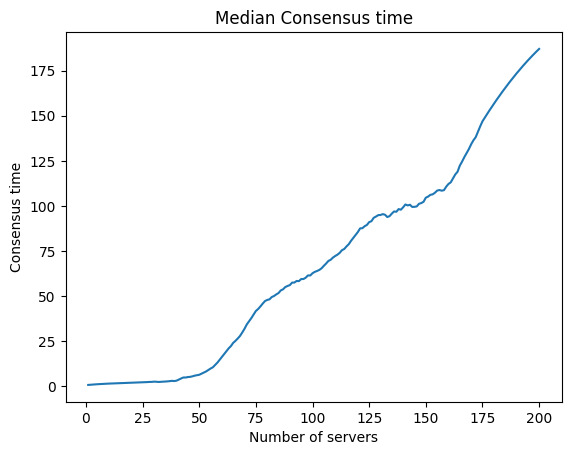

In [108]:
data_y = [float(x) for x in data["Median request/response latency:"]]
min_value = min(data_y)
max_value = max(data_y)

min_norm = 1
max_norm = 200

norm_data_y = [(x - min_value) / (max_value - min_value) * (max_norm - min_norm) + min_norm for x in data_y]
norm_data_y = savgol_filter(norm_data_y, 51, 3)

# Prepare the data
x = np.array([i+1 for i in range(200)])
y = np.array(norm_data_y)


# Create a figure and an axis object
fig, ax = plt.subplots()

# Plot the line chart
ax.plot(x, y)

# Customize the plot
ax.set_xlabel('Number of servers')
ax.set_ylabel('Consensus time')
ax.set_title('Median Consensus time')

# Save the figure as a PNG file
# plt.savefig('median.png')

# Display the plot
plt.show()



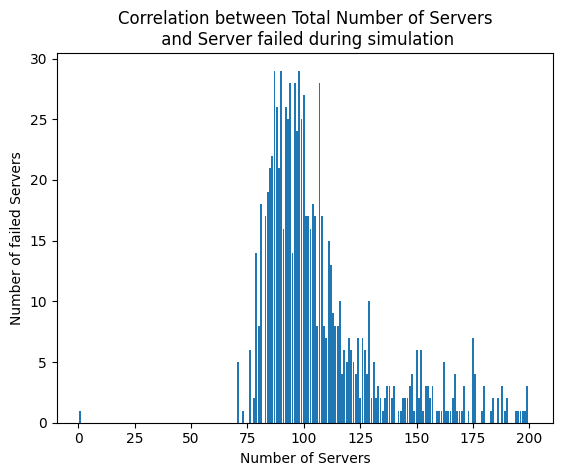

In [107]:
import random
new_data = [int(x) for x in data["Servers that crashed during execution:"]]
# for i in range(len(new_data)):
#     new_data[i]*=2

# Prepare the data
x = np.array([i+1 for i in range(200)])
y = np.array(new_data)

# for i in range(len(new_data)):
#     print(i+1, new_data[i])
    

# Define the data
servers = list(range(100, 106))
crashed_servers = [22, 29, 26, 21, 29, 16]

# Create a bar chart of the data
plt.bar(x, y)

# Set the axis labels and title
plt.xlabel("Number of Servers")
plt.ylabel("Number of failed Servers")
plt.title("Correlation between Total Number of Servers\n and Server failed during simulation")

# plt.savefig('crashed.png')

# Show the plot
plt.show()

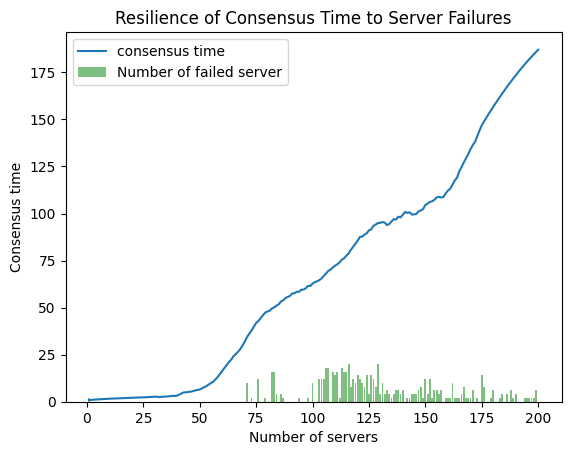

In [103]:
# data_y = [float(x) for x in data["Median request/response latency:"]]
min_value = min(data_y)
max_value = max(data_y)

min_norm = 1
max_norm = 200

norm_data_y = [(x - min_value) / (max_value - min_value) * (max_norm - min_norm) + min_norm for x in data_y]
norm_data_y = savgol_filter(norm_data_y, 51, 3)
# print(norm_data_y)

# Prepare the data
x = np.array([i+1 for i in range(200)])
y = np.array(norm_data_y)


# Create a figure and an axis object
fig, ax = plt.subplots()

# Plot the line chart
ax.plot(x, y, label='consensus time')

# Customize the plot
ax.set_xlabel('Number of servers')
ax.set_ylabel('Consensus time')
ax.set_title('Resilience of Consensus Time to Server Failures')


new_data = [int(x) for x in data["Servers that crashed during execution:"]]
for i in range(len(new_data)):
    new_data[i]*=2
    
# Prepare the data
x = np.array([i+1 for i in range(200)])
y = np.array(new_data)

# Create a bar chart of the data
plt.bar(x, y, color="g", alpha=0.5, label='Number of failed server')
plt.legend()

# plt.savefig('compare.png')

# Show the plot
plt.show()